## Daniel Barella
## 9/18/25

## Introduction
Linear regression models the relationship between a dependent variable (target) and one or more independent variables (features).

- **Simple Linear Regression**: One feature predicts the target.
- **Equation**: y = β₀ + β₁x + ε
  - β₀ = intercept
  - β₁ = slope
  - ε = error term

We will use the **Wine Quality dataset** to predict `alcohol` based on `density`.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

wine = pd.read_csv("wine_clean.csv")
wine.head()


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0


In [2]:
# Check for missing values
wine.isna().sum()



fixed_acidity           1
volatile_acidity        1
citric_acid             1
residual_sugar          1
chlorides               1
free_sulfur_dioxide     1
total_sulfur_dioxide    1
density                 1
pH                      1
sulphates               1
alcohol                 1
quality                 1
dtype: int64

## Handling NaNs
Our dataset shows **1 missing value in every column**.  
Since this corresponds to a single row with all NaNs, the simplest solution is to drop it.


In [3]:
# Drop the single NaN row
wine = wine.dropna()

# Confirm removal
wine.isna().sum()


fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Exploratory Scatter Plot
Visualize the relationship between `density` and `alcohol`.


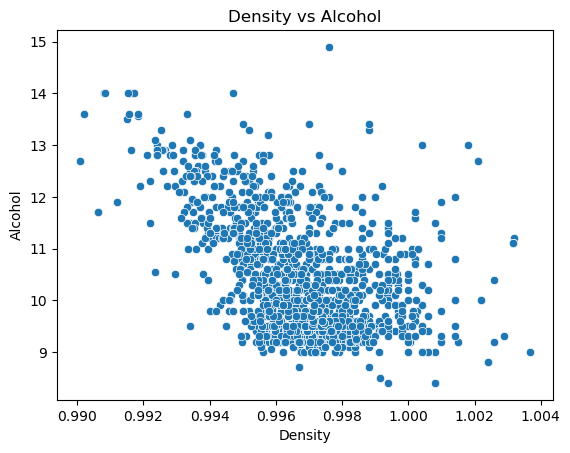

In [4]:
sns.scatterplot(x='density', y='alcohol', data=wine)
plt.title("Density vs Alcohol")
plt.xlabel("Density")
plt.ylabel("Alcohol")
plt.show()


## Prepare Data
Select features (X) and target (y) for the regression model.


In [5]:
X = wine[['density']]  # Feature
y = wine['alcohol']    # Target


## Fit Linear Regression Model
Train a simple linear regression model and inspect coefficients.


In [6]:
model = LinearRegression()
model.fit(X, y)

print("Intercept (β₀):", model.intercept_)
print("Slope (β₁):", model.coef_[0])


Intercept (β₀): 289.6753433825651
Slope (β₁): -280.1638230682627


## Predictions
Generate predictions and visualize the regression line.


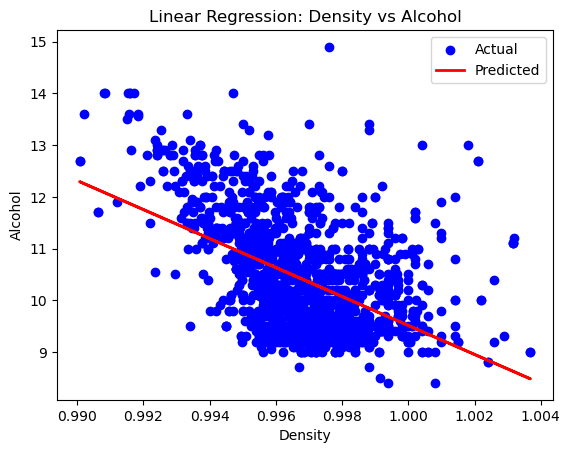

In [7]:
y_pred = model.predict(X)

plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_pred, color='red', linewidth=2, label='Predicted')
plt.title("Linear Regression: Density vs Alcohol")
plt.xlabel("Density")
plt.ylabel("Alcohol")
plt.legend()
plt.show()


## Model Evaluation
Evaluate the model using common metrics.


In [8]:
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)


MAE: 0.7469164970343729
MSE: 0.8555220359235426
RMSE: 0.924944342067966
R²: 0.24619436439710696


Metrics

MAE (0.75)
On average, your predictions are 0.75% alcohol away from the actual values.
(Example: predict 12.0 when real is 12.7)

MSE (0.86)
The average squared error. Squaring punishes big mistakes more heavily.

RMSE (0.92)
The "standard deviation of errors." On average, your predictions are off by about 0.92% alcohol.
This is usually easier to interpret than MSE.

R² (0.246)
Your model explains about 24.6% of the variance in alcohol content.
In other words, density alone captures only a quarter of the story — other features (like sugar, pH, sulphates, etc.) matter a lot too.

Meaning

Your model works in the right direction (negative relationship makes sense chemically).

But accuracy is limited — density by itself isn’t enough to predict alcohol well.

## Reflection
- Learned how to fit a simple linear regression model using scikit-learn.
- Visualized the regression line on a scatter plot.
- Evaluated model performance with MAE, MSE, RMSE, and R².
- Next step: multiple regression with multiple features (Day 19).


In [10]:
# wine.to_csv("wine_clean.csv", index=False)


In [11]:
# wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
